In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sett_types = pd.read_csv("../../data/hun/HU_places_admin_pop_ZIP_latlon.csv",
           sep=',',
           header=0)
KSH = pd.read_csv("../../data/hun/KSHCommuting_c1ID_c1name_c2ID_c2name_comm_school_work_DIR.csv",
           sep=',',
           header=0)
#df=pd.merge(KSH, sett_types, left_on="origName", right_on="place")

In [3]:
KSH

,origID,origName,destID,destName,CommutersAll,CommutersSchool,CommutersWork
0,1508,Ipolyszög,1508,Ipolyszög,40,0,40
1,1508,Ipolyszög,3115,Dunaújváros,2,0,2
2,1508,Ipolyszög,3179,Budapest 02. ker.,2,0,2
3,1508,Ipolyszög,3249,Õrhalom,2,0,2
4,1508,Ipolyszög,4507,Szendehely,4,0,4
...,...,...,...,...,...,...,...
114040,34412,Mosonudvar,28149,Mosonszolnok,19,0,19
114041,34412,Mosonudvar,29221,Jánossomorja,5,0,5
114042,34412,Mosonudvar,31839,Újrónafõ,2,0,2
114043,34412,Mosonudvar,34412,Mosonudvar,52,0,52


In [4]:
sett_types

,place,KSH code,settlement type,admin county,admin municip,population,zip,latitude,longitude
0,Aba,17376,nagyközség,Fejér,Aba,4619,8127,47.0291,18.5217
1,Abádszalók,12441,város,Jász-Nagykun-Szolnok,Tiszafüred,3922,5241,47.4667,20.6000
2,Abaliget,12548,község,Baranya,Pécs,586,7678,46.1426,18.1168
3,Abasár,24554,község,Heves,Gyöngyös,2498,3261,47.7970,20.0032
4,Abaújalpár,15662,község,Borsod-Abaúj-Zemplén,Encs,76,3882,48.3067,21.2332
...,...,...,...,...,...,...,...,...,...
3172,Zsennye,12292,község,Vas,Szombathely,100,9766,47.1130,16.8152
3173,Zsira,4622,község,Győr-Moson-Sopron,Sopron,782,9476,47.4576,16.6773
3174,Zsombó,17765,község,Csongrád,Szeged,3552,6792,46.3257,19.9746
3175,Zsujta,11022,község,Borsod-Abaúj-Zemplén,Gönc,164,3897,48.5000,21.2833


In [5]:
len(set(KSH["origName"]))
print(set(sett_types["settlement type"]))
sett_types.groupby("settlement type").size().sort_values(ascending=False)

{'város', 'község', 'főváros', 'fővárosi kerület', 'megyei jogú város', 'megyeszékhely-megyei jogú város', 'nagyközség'}


settlement type
község                             2706
város                               304
nagyközség                          120
fővárosi kerület                     23
megyeszékhely-megyei jogú város      18
megyei jogú város                     5
főváros                               1
dtype: int64

In [6]:
sett_types[sett_types["population"]>=5000]

,place,KSH code,settlement type,admin county,admin municip,population,zip,latitude,longitude
12,Abony,27872,város,Pest,Cegléd,14876,2740,47.1899,20.0048
14,Ács,4428,város,Komárom-Esztergom,Komárom,6965,2941,47.7123,18.0113
31,Ajka,6673,város,Veszprém,Ajka,29058,8400,47.1020,17.5589
37,Albertirsa,31653,város,Pest,Cegléd,12410,2730,47.2431,19.6169
40,Algyő,34245,nagyközség,Csongrád,Szeged,5251,6750,46.3347,20.2085
...,...,...,...,...,...,...,...,...,...
3061,Vésztő,29531,város,Békés,Szeghalom,6680,5530,46.9167,21.2667
3111,Zalaegerszeg,32054,megyeszékhely-megyei jogú város,Zala,Zalaegerszeg,61849,8900,46.8400,16.8439
3129,Zalaszentgrót,32522,város,Zala,Zalaszentgrót,6473,8785,46.9447,17.0793
3157,Zirc,26499,város,Veszprém,Zirc,7096,8420,47.2636,17.8737


In [7]:
korfa_teltip0 = {
    "főváros|fővárosi kerület": [210640, 81626, 246127, 313540, 213367, 225379, 216828, 221533, 1729040],
    "megyeszékhely-megyei jogú város": [238608 , 116868 , 233585 , 287108 , 227042 , 252073 , 209260 , 197113 , 1761657],
    "megyei jogú város": [37141, 15599, 32610, 44865, 35886, 39168, 32719, 29748, 267736],
    "város": [477932, 195704, 364021, 491615, 422355, 466796, 373198, 353804, 3145425],
    "all_város": [964321, 409797, 876343, 1137128, 898650, 983416, 832005, 802198, 6903858],
    "község|nagyközség": [483338, 183737, 353193, 443785, 417543, 455266, 344957, 351951, 3033770],
    "all": [1447659 , 593534 , 1229536 , 1580913 , 1316193 , 1438682 , 1176962 , 1154149 , 9937628],
}

korfa_teltip1 = {
    "főváros": [210640, 81626, 246127, 313540, 213367, 225379, 216828, 221533, 1729040],
    "fővárosi kerület": [210640, 81626, 246127, 313540, 213367, 225379, 216828, 221533, 1729040],
    "megyeszékhely-megyei jogú város": [238608 , 116868 , 233585 , 287108 , 227042 , 252073 , 209260 , 197113 , 1761657],
    "megyei jogú város": [37141, 15599, 32610, 44865, 35886, 39168, 32719, 29748, 267736],
    "város": [477932, 195704, 364021, 491615, 422355, 466796, 373198, 353804, 3145425],
    "all_város": [964321, 409797, 876343, 1137128, 898650, 983416, 832005, 802198, 6903858],
    "község": [483338, 183737, 353193, 443785, 417543, 455266, 344957, 351951, 3033770],
    "nagyközség": [483338, 183737, 353193, 443785, 417543, 455266, 344957, 351951, 3033770],
    "all": [1447659 , 593534 , 1229536 , 1580913 , 1316193 , 1438682 , 1176962 , 1154149 , 9937628],
}
ages = ["0–14", "15–19", "20–29", "30–39", "40–49", "50–59", "60–69", "70–", "all"] 

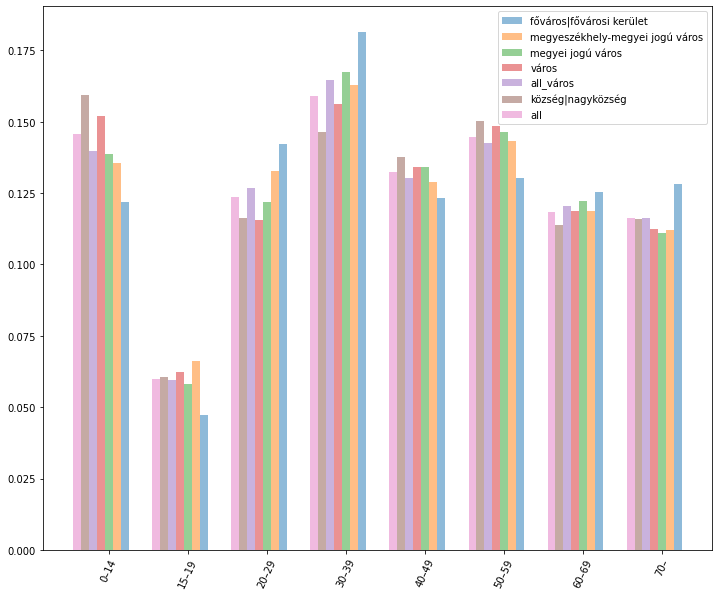

In [8]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
x = np.array(range(8))
for i, (teltip, arr) in enumerate(korfa_teltip0.items()):
    plt.bar(x-(i-2)*0.1, arr[:-1]/np.sum(arr[:-1]), label=teltip, alpha=0.5, width=0.1)
    
ax.set_xticks(x)
ax.set_xticklabels(ages[:-1], rotation=65)
plt.legend()

# Create population.json

In [19]:
def get_age(row, korfa_teltip):
    arr = np.array(korfa_teltip[row["settlement type"]])
    arr = arr[:-1]/np.sum(arr[:-1])
    N = row["population"]
    
    ages = [int(N*arr[0]/3), int(N*arr[0]/3), int(N*arr[0]/3), *[int(N*ratio) for ratio in arr[1:]]]
    #print(sum(ages)-N)
    ages = [{"N": s, "S":s, "L":0, "I":0, "R":0} for s in ages]
    return ages

def create_population_dict(population_th):
    small_cities = sett_types[sett_types["population"]>population_th]
    
    place_id_dict = {}
    population = {"populations":[]}
    for ind, (_, row) in enumerate(small_cities.iterrows()):
        place_id_dict[row['place']] = ind
        city = {
            "name": row["place"],
            "index": ind,
            "N": row["population"],
            "r1":1.0,
            "r2":1.0,
            "age": get_age(row, korfa_teltip1)
        }
        population["populations"].append(city)
        ind += 1
    return population, set(small_cities['place']), place_id_dict

pops,cities,place_id_dict = create_population_dict(population_th=5000)

In [20]:
pops["populations"][0]

{'name': 'Abony',
 'index': 0,
 'N': 14876,
 'r1': 1.0,
 'r2': 1.0,
 'age': [{'N': 753, 'S': 753, 'L': 0, 'I': 0, 'R': 0},
  {'N': 753, 'S': 753, 'L': 0, 'I': 0, 'R': 0},
  {'N': 753, 'S': 753, 'L': 0, 'I': 0, 'R': 0},
  {'N': 925, 'S': 925, 'L': 0, 'I': 0, 'R': 0},
  {'N': 1721, 'S': 1721, 'L': 0, 'I': 0, 'R': 0},
  {'N': 2325, 'S': 2325, 'L': 0, 'I': 0, 'R': 0},
  {'N': 1997, 'S': 1997, 'L': 0, 'I': 0, 'R': 0},
  {'N': 2207, 'S': 2207, 'L': 0, 'I': 0, 'R': 0},
  {'N': 1765, 'S': 1765, 'L': 0, 'I': 0, 'R': 0},
  {'N': 1673, 'S': 1673, 'L': 0, 'I': 0, 'R': 0}]}

In [21]:
with open("../input/hun/populations_KSH.json", "w") as f:
    f.write(json.dumps(pops))

In [22]:
N = len(cities)
print(f"Number of cities: {N}")

Number of cities: 295


In [13]:
pop_dict = {row['place']:row["population"] for _,row in sett_types.iterrows()}

# Create commuting.json

In [14]:
edges = {}
mtx = np.zeros((N,N))
for _,row in KSH.iterrows():
    weight = row["CommutersAll"]
    orig,dest = row["origName"], row["destName"]
    if((orig in cities) and (dest in cities)):
        edges[(place_id_dict[orig], place_id_dict[dest])] = weight/pop_dict[orig]
        mtx[place_id_dict[orig], place_id_dict[dest]] = weight/pop_dict[orig]

In [15]:
print(f"#of edges: {len(edges)} [{N**2}] ==> {100*len(edges)/N**2:.3f}% density")

#of edges: 18511 [87025] ==> 21.271% density


In [16]:
network = []
for i in range(N):
    for j in range(N):
        if(i==j): continue
        network.append({"from":i, "to":j, "weight":mtx[i,j]})

commuting = {
    "N":N,
    "network":network
}

In [17]:
len(network)

86730

In [18]:
with open("../input/hun/commuting_KSH.json", "w") as f:
    f.write(json.dumps(commuting))